In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
os.chdir('/Users/lauosgom/Desktop/zoomcamp/')

In [12]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

In [14]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [15]:
# calculate the duration of the trip
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df['duration'] = df['duration'].apply(lambda td: td.total_seconds() / 60)

In [16]:
# How many columns are there?
a = df.shape[0]

In [18]:
df.shape

(2463931, 20)

In [19]:
df['duration'].std()

46.44530513776802

/tmp/ipykernel_27553/1000415856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


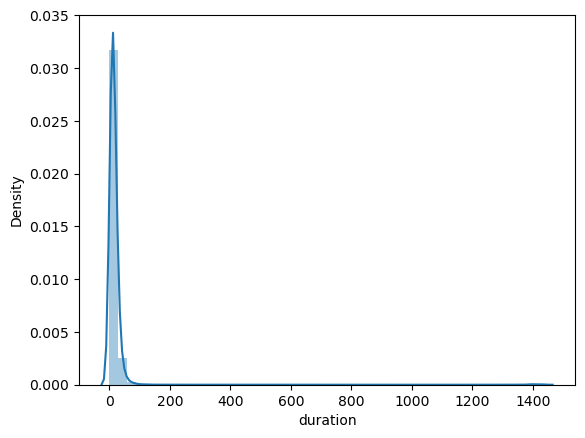

In [44]:
# check the distribution of duration
sns.distplot(df.duration)
plt.show()

In [45]:
df.duration.describe(percentiles = [0.95, 0.98, 0.99])

count    62495.000000
mean        19.019387
std         78.215732
min          0.000000
50%         11.583333
95%         35.438333
98%         49.722667
99%         68.453000
max       1439.466667
Name: duration, dtype: float64

In [46]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60) ]

In [47]:
# What fraction of the records left after you dropped the outliers?
b = df.shape[0]

In [48]:
b/a

0.9537242979438355

In [49]:
# decide which categorical and numerical variables we are going to use
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [57]:
df[categorical] = df[categorical].astype(str)

In [58]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

In [60]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [61]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',

In [66]:
target = 'duration'
y_train = df[target].values

In [69]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_27553/4107668193.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label = 'prediction')
/tmp/ipykernel_27553/4107668193.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label = 'actual')


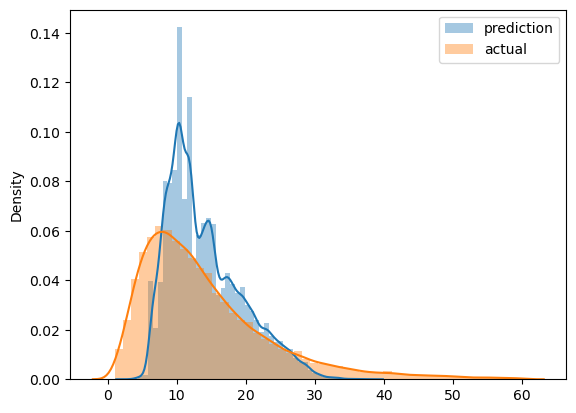

In [75]:
sns.distplot(y_pred, label = 'prediction')
sns.distplot(y_train, label = 'actual')

plt.legend()

In [77]:
mean_squared_error(y_train, y_pred)

59.84250188218786